# Homework Assignment 3
## Regression models

### <p style="text-align: right;"> &#9989; Nathan Taylor.</p>
### <p style="text-align: right;"> &#9989; nathanjtaylor</p>

### Goal for this homework assignment
By now, you have learned a bit about regression models. In this assignment, you will practice:

* Using branches in Git
* Performing linear regression
* Performing multiple regression
* Performing logistic regression

**This assignment is due by 11:59 pm on Friday, November 15th.** It should be uploaded into the "Homework Assignments" submission folder for Homework 3.  Submission instructions can be found at the end of the notebook. **There are 72 standard points possible in this assignment. The distribution of points can be found in the section headers**.


---
## Part 1: Git Branch (6 points)


For this assignment, you're going to add it to the `cmse202-f24-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-f24-turnin` **local** repository and create a new directory called `hw-03`

2. Move this notebook into that **new directory** in your repository, but **do not** add or commit it to your repository yet.

3. Create a **new branch** called `hw03_branch` (The Day 16 PCA and ICA content has information on how to do this).

4. "Check out" the new branch (so that you'll be working on that branch). 

5. Double check to make sure you are actually on that branch.

6. Once you're certain you're working on your new branch, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw03_branch` to push your new branch to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

git clone https://github.com/nathanjtaylor/CMSE202-f24-turnin.git

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f24-turnin`" repository inside the `hw-03` directory that you just created within the new branch `hw03-branch`.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.


---
## Part 2: Loading up on Portuguese Wine (13 points)


For this homework, you’ll be working with the Wine Quality dataset from the UCI Machine Learning Repository, which contains measurements of various chemical properties of red and white wines. The dataset includes properties like fixed acidity, volatile acidity, citric acid, and other measurements important for understanding wine characteristics. This data was collected to support predictive models of wine quality, based on a range of measurable attributes. The wine dataset is distributed into two files: 1) for red wines and 2) for white wines. 

While Parts 3, 4, and 5 are structured so that they can be completed independently of each other, it is recommended to finish Part 2 before moving on to these sections. To get started on Part 2, you’ll need to download the following file:

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

and a description of the files here:

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names

✅ **Question 2.1 (1 point)**: Do this: Save the winequality-red.csv, winequality-white.csv,  file in the same directory as your notebook. Then, in the cell below, put the command line command(s) you used to download the file. If you did not use a command line tool to download the file, write down the command(s) that would have downloaded the file.

``` bash
# Put the command you used to download the wine dataests file here.
```

**Answer.**
```bash
curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv -O
curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv -O
curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names -O
```

&#9989;  **Question 2.2 (4 points)**: Next, load the data of red and white wine into two separate Pandas DataFrames and display the first and last 5 rows. 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Put your code here
red = pd.read_csv("winequality-red.csv", delimiter=';')
white = pd.read_csv("winequality-white.csv", delimiter=';')

print("RED")
red.head(5)

RED


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
print("WHITE")
white.head(5)

WHITE


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


&#9989;  **Question 2.3 (4 points)**: Let’s investigate which features of red wines are correlated by plotting a correlation heatmap using Seaborn. Create a heatmap to visualize the relationships between various chemical properties of red wine.

Remember to rotate the tick labels so they are easy to read, and use tight_layout() to avoid any label cut-offs.

Text(0.5, 1.0, 'Red Wine')

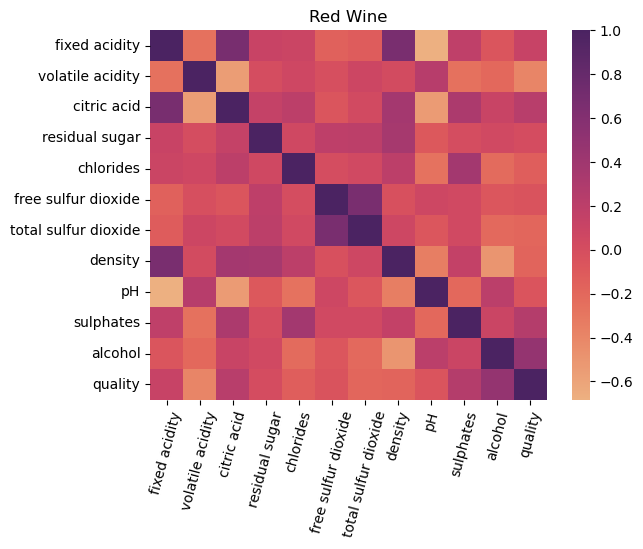

In [4]:
# Put your code here
heatmap = sns.heatmap(red.corr(), cmap="flare")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=75)
plt.title("Red Wine")

&#9989;  **Question 2.4 (4 points)**: Let’s investigate which features of white wines now are correlated by plotting a correlation heatmap using Seaborn. Create a heatmap to visualize the relationships between various chemical properties of red wine.

Remember to rotate the tick labels so they are easy to read, and use tight_layout() to avoid any label cut-offs.
Which features are different between red and white?

Text(0.5, 1.0, 'White Wine')

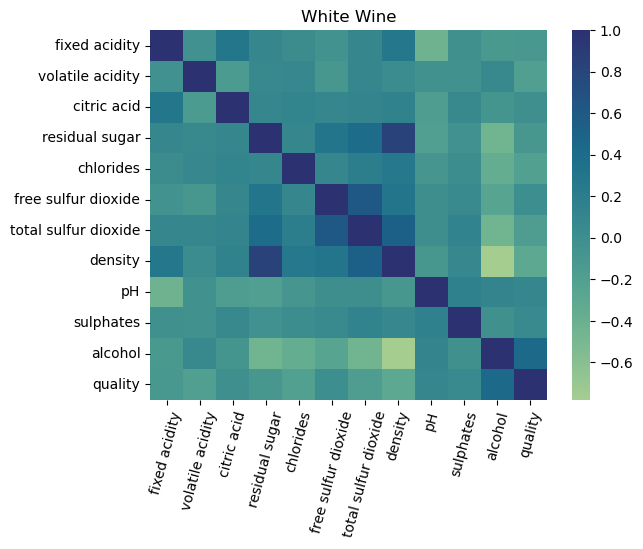

In [5]:
# Put your code here
heatmap = sns.heatmap(white.corr(), cmap="crest")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=75)
plt.title("White Wine")

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 2 complete", and push the changes to GitHub.

---

---
## Part 3: One Variable Linear Regression (21 points)

In exploring the characteristics of wine, understanding the relationship between individual chemical components can provide insights into the wine’s flavor profile, quality, and potential fermentation properties. One simple yet valuable analysis is examining the relationship between citric acid and fixed acidity.

Citric acid, a natural preservative that adds freshness, often contributes to the tartness and overall acidity in wine. Meanwhile, fixed acidity is a broader measure that includes acids, such as tartaric and malic acid, giving wine its sharp, crisp taste. By performing a single-variable linear regression with citric acid as the predictor for fixed acidity, we can investigate whether higher levels of citric acid are associated with an increase in fixed acidity, potentially indicating a specific acid balance characteristic to certain wine types.

This regression analysis can reveal subtle patterns in acidity management, helping winemakers predict and control acidity levels for quality consistency, and giving scientists insight into how specific acid types interact in the broader context of wine chemistry.

&#9989;  **Question 3.1 (3 points)**: Using the OLS method in `statsmodels`, perform a linear regression to predict the fixed acidity of a wine sample using its citric acid content and display the results summary. Remember that you may need to use the add_constant() method to ensure OLS fits a general line  y = ax + b  to the data rather than a line through the origin  y = ax .

For this problem, make sure that you’re using the entire wine dataset, not just a subset of the data. So the first part should be to make a combined dataframe (using `pd.concat`) out of white and red

In [6]:
red_copy = red
white_copy = white

In [7]:
wine = pd.concat([red_copy, white_copy])  # combine datasets

x = wine["fixed acidity"]
y = wine["citric acid"]
x_with_cnst = sm.add_constant(x)
model = sm.OLS(y, x_with_cnst)
results = model.fit()

results.params

const            0.056240
fixed acidity    0.036366
dtype: float64

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            citric acid   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     764.1
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          4.19e-159
Time:                        11:32:51   Log-Likelihood:                 3674.6
No. Observations:                6497   AIC:                            -7345.
Df Residuals:                    6495   BIC:                            -7332.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0562      0.010      5.831      0.000       0.037       0.075
fixed acidity     0.0364      0.001     27.642      0.000       0.034       0.039
==============================================================================
Omnibus:                      642.167   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2742.737
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                       6.076   Cond. No.                         42.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989;  **Question 3.2 (3 points)**: Answer the following questions: 

1.	What was the equation of the best-fit linear relationship between a red wine’s fixed acidity and its citric acid content?
2.	As a red wine’s citric acid content increases, does its fixed acidity increase or decrease? What aspect of the regression output tells you this?
3.	Based on the  p -value for citric acid, is the relationship you found between a wine’s fixed acidity and citric acid content statistically significant? Justify your answer.

**Answer.** 
* y = 0.036366x + 0.056240
* Yes, as citric acid content increases, fixed acidity increases a little bit, we know this from the *slope* of the equation of best fit
* Because the p value is 0, which is less than 0.05 this correlation is generally considered statistically significant 

&#9989; **Question 3.3 (4 points, 2 points per part)**: Now, let's perform linear regression separately for red and white wine. To avoid confusion and ensure that results are not overwritten, make sure that the variable names for the OLS models and results are different for each wine type.

&#9989; **Question 3.3.Red (2 points)**: Using the `OLS` method in `statsmodels`, perform a linear regression to predict the **fixed acidity** of red wine samples using **citric acid** as the predictor, and display the results summary.



In [9]:
red_x = red["fixed acidity"]
red_y = red["citric acid"]
red_x_with_cnst = sm.add_constant(red_x)
red_model = sm.OLS(red_y, red_x_with_cnst)
red_results = red_model.fit()

print("Red Wine")
red_results.summary()

Red Wine


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            citric acid   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     1313.
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          2.54e-210
Time:                        11:32:51   Log-Likelihood:                 826.92
No. Observations:                1599   AIC:                            -1650.
Df Residuals:                    1597   BIC:                            -1639.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3543      0.018    -20.095      0.000      -0.389      -0.320
fixed acidity     0.0752      0.002     36.234      0.000       0.071       0.079
==============================================================================
Omnibus:                       82.195   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.566
Skew:                           0.519   Prob(JB):                     1.45e-22
Kurtosis:                       3.658   Cond. No.                         42.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989; **Question 3.3.White (2 points)**: Using the `OLS` method in `statsmodels`, perform a linear regression to predict the **fixed acidity** of white wine samples using **citric acid** as the predictor, and display the results summary.

In [10]:
white_x = white["fixed acidity"]
white_y = white["citric acid"]
white_x_with_cnst = sm.add_constant(white_x)
white_model = sm.OLS(white_y, white_x_with_cnst)
white_results = white_model.fit()

print("White Wine")
white_results.summary()

White Wine


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            citric acid   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     446.8
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           5.62e-95
Time:                        11:32:51   Log-Likelihood:                 3608.0
No. Observations:                4898   AIC:                            -7212.
Df Residuals:                    4896   BIC:                            -7199.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0499      0.014      3.683      0.000       0.023       0.076
fixed acidity     0.0415      0.002     21.137      0.000       0.038       0.045
==============================================================================
Omnibus:                     1620.377   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10641.380
Skew:                           1.418   Prob(JB):                         0.00
Kurtosis:                       9.640   Cond. No.                         57.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989; **Question 3.4 (5 points)**: Answer the following questions:

1. For both red and white wines, what is the equation of the best-fit linear relationship between **fixed acidity** and **citric acid**?

2. For both red and white wines, as citric acid content increases, does the fixed acidity increase or decrease?

3. Based on the \( p \)-values for citric acid, is the relationship between fixed acidity and citric acid content statistically significant for each wine type?

<font size=+3>&#9998;</font> Put your answers here:



&#9989; **Question 3.5 (6 points)**: Assuming you did everything correctly, the relationship between a wine's **fixed acidity** and **citric acid** content may differ when you split the data by wine type (red or white). This might seem confusing at first. Part of the reason for this is because we skipped a very important step when working with unfamiliar data: **visualizing the data**.

**Do this**: Make a scatterplot showing **fixed acidity** vs. **citric acid** for the wine dataset. Color-code the points so that red and white wines are in different colors. Then, display the best fit line for each type of wine in the same color as the points, and also display the best fit line for all wines combined in a different color. Don’t forget to label your axes. When you’re done, your plot should contain two colors of points and three lines (two lines should match the colors of the two wine types, and one line for the combined data in a different color).

**Hint**: We've included a function to help you plot a line. Feel free to use it, or not.

In [11]:
white_intersect, white_slope = white_results.params
red_intersect, red_slope = red_results.params
intersect, slope = results.params

(0.0, 1.25)

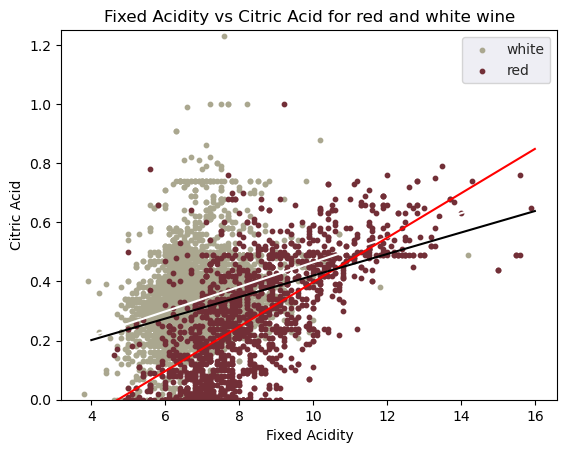

In [12]:
import matplotlib.pyplot as plt
import numpy as np
def plot_line(slope, intercept, xmin, xmax, color):
    xline = np.array([xmin,xmax])
    yline = slope*xline+intercept
    plt.plot(xline,yline,color)

# Put your code here
plt.scatter(white_x, white_y, c='#aaa78f',s=10, label="white")
plt.scatter(red_x, red_y, c='#722f37',s=10, label="red")

plot_line(white_slope, white_intersect, 4, 16, 'white')
plot_line(red_slope, red_intersect, 4, 16, 'red')
plot_line(slope, intersect, 4, 16, 'black')

sns.set_style("darkgrid")
plt.xlabel("Fixed Acidity")
plt.ylabel("Citric Acid")
plt.title("Fixed Acidity vs Citric Acid for red and white wine")
plt.legend()
plt.ylim(0,1.25)

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 3 complete", and push the changes to GitHub.

---

## Part 4: Multiple Regression (16 points)

In this part, we'll use multiple features to predict the **quality** of **red** wine samples. Specifically, we’ll explore how a combination of chemical properties—such as **volatile acidity**, **citric acid**, **alcohol**, and others—can be used to estimate the overall **quality** rating of red wines.

&#9989; **Question 4.1 (3 points)**: Using the `OLS` method in `statsmodels`, perform a multivariable linear regression to predict the **quality** of wine based on **volatile acidity**, **citric acid**, and **alcohol content**. Be sure to use the `add_constant()` method to ensure `OLS` includes a constant term in the model. As before, make sure to **display a summary of your results**.

In [13]:
# Put your code here
multi_x = wine[["volatile acidity","citric acid","alcohol"]]
multi_y = wine["quality"]
multi_x_with_cnst = sm.add_constant(multi_x)
multi_model = sm.OLS(multi_y, multi_x_with_cnst)
multi_results = multi_model.fit()

In [14]:
multi_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     758.5
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:32:51   Log-Likelihood:                -7361.8
No. Observations:                6497   AIC:                         1.473e+04
Df Residuals:                    6493   BIC:                         1.476e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.9401      0.091     32.174      0.000       2.761       3.119
volatile acidity    -1.3322      0.061    -21.752      0.000      -1.452      -1.212
citric acid         -0.0291      0.069     -0.419      0.675      -0.165       0.107
alcohol              0.3184      0.008     40.673      0.000       0.303       0.334
==============================================================================
Omnibus:                      113.288   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.581
Skew:                           0.006   Prob(JB):                     1.40e-50
Kurtosis:                       3.921   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
test_data = pd.DataFrame({'const': 1, 'volatile acidity': [0.52], 'citric acid': [0.27], 'alcohol': [10.0]})

multi_results.predict(test_data)

0    5.422985
dtype: float64

&#9989; **Question 4.2 (4 points)**: Answer the following questions:

1. Suppose a red wine sample has a volatile acidity of 0.52, citric acid content of 0.27, and alcohol of 10.0. What does your linear model predict for the wine's quality rating? Explain how you arrived at your answer.

2. For each of the features (volatile acidity, citric acid, and residual sugar), specify if it is statistically significant in the model. Briefly justify your answers.

**Answers:** 

1. Using model.predict on a dataframe of this test data, the model tells me the quality would be 5.42 at those values
2. For volatile acidity and alcohol the P value is 0, which would indicate it as statistically significant, but citric acid having a P value of 0.675, which is above 0.5 indicates it is not

&#9989;  **Question 4.3 (3 points)**: Perform the same multivariable linear regression again, but this time check for chemicals and check if that improves the quality determination. Display the summary of these results.

In [16]:
# Put your code here
# Put your code here
multi_x = wine[["chlorides","free sulfur dioxide","total sulfur dioxide", "sulphates"]]
multi_y = wine["quality"]
multi_x_with_cnst = sm.add_constant(multi_x)
multi_model = sm.OLS(multi_y, multi_x_with_cnst)
multi_results = multi_model.fit()
multi_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     137.9
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          2.90e-113
Time:                        11:32:51   Log-Likelihood:                -8072.9
No. Observations:                6497   AIC:                         1.616e+04
Df Residuals:                    6492   BIC:                         1.619e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.9342      0.051    115.309      0.000       5.833       6.035
chlorides               -6.8178      0.330    -20.685      0.000      -7.464      -6.172
free sulfur dioxide      0.0088      0.001     10.394      0.000       0.007       0.010
total sulfur dioxide    -0.0033      0.000    -12.014      0.000      -0.004      -0.003
sulphates                0.7135      0.078      9.205      0.000       0.562       0.865
==============================================================================
Omnibus:                       66.012   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.338
Skew:                           0.155   Prob(JB):                     2.95e-19
Kurtosis:                       3.468   Cond. No.                     4.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

&#9989;  **Question 4.4 (4 points)**: Answer these questions: 

1. Qualitatively, how much better/worse is the reduced model compared to the original model? Briefly justify your answer.

2. Explain in your own words why we might want to use a model with fewer features, even if it fits the data a bit worse than a model with more features.

**Answers:**
1. The second model is worse, and we can tell based on the adjusted r-squared value. The first model has 0.260 and the second one has 0.078.
2. Using less features can avoid fitting the data too closely to the point where the *trend* isn't being detected

&#9989; **Question 4.5 (2 points)**: Suppose we wanted to use the **color** of a wine (red or white) as a feature to predict its quality. Will simply including the `color` column in the second argument to `OLS()` work? If not, why, and what could we do to fix it?

**Answer.** If there was a color column in ```wine``` and it contained values either *red* or *white* that could not just be used in a regression model, it would have to be first translated to a numeric binary system, like red=0 and white=1

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 4 complete", and push the changes to GitHub.

---

## Part 5: Logistic Regression (16 points)

In this part, we'd like to use logistic regression to classify whether a wine is **red** or **white** based on its chemical properties. Logistic regression, as we've learned in class, is commonly used for binary classification. Here, we’ll use it to distinguish between the two wine types, aiming for high accuracy in prediction, as mistaking one for the other could lead to a poor wine pairing experience!

&#9989; **Question 5.1 (4 points)**: Let's start by setting up a classifier to distinguish **red wines** from **white wines**.

**Do This**: Add a new column called `color` to both the red and white wine DataFrames. For red wine samples, set `color` to 1, and for white wine samples, set `color` to 0. Then, use `pd.concat()` to combine the two DataFrames into one unified DataFrame.

**Hint**: After creating the `color` column in each DataFrame, use `pd.concat([df_red, df_white])` to concatenate them into a single DataFrame.

Finally, split the combined DataFrame into **features** and **labels**, where `features` consists of all columns except `color` and `quality`, and `labels` is the `color` column.

In [19]:
white['color'] = 0
red['color'] = 1

wine = pd.concat([red, white], ignore_index=True)

features = wine.drop(['quality', 'color'], axis=1)  # Drop 'quality' and 'color' from features
labels = wine['color']  # 'color' is the label

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state=0)

&#9989;  **Question 5.2 (4 points)**: Split your data into a training and testing set with a training set representing 75% of your data. For reproducibility, set the `random_state` argument to `0`. Print the shapes of the training features, the testing features, the training labels, and the testing labels to show you have the right number of entries in each of the four variables.

In [21]:
# Put your code here
print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

(4872, 11)
(1625, 11)
(4872,)
(1625,)


&#9989;  **Question 5.3 (4 points)**: Now, train a logistic regression model using your training features and training labels. **Display the summary**.

In [22]:
logit_model = sm.Logit(train_labels, train_features)  # Use train_labels and train_features
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.051076
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  color   No. Observations:                 4872
Model:                          Logit   Df Residuals:                     4861
Method:                           MLE   Df Model:                           10
Date:                Wed, 13 Nov 2024   Pseudo R-squ.:                  0.9088
Time:                        11:33:52   Log-Likelihood:                -248.84
converged:                       True   LL-Null:                       -2727.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            1.4932      0.152      9.805      0.000       1.195       1.79

&#9989;  **Question 5.4 (4 points)**: Finally, test your logistic regression model using your testing features and testing labels. Display the fraction of testing data points that were correctly predicted. 

In [38]:
test_predictions_prob = result.predict(test_features)

#accuracy = accuracy_score(test_labels, test_predictions_prob)

5316    0.0
5210    0.0
3518    0.0
1622    0.0
2443    0.0
       ... 
2152    0.0
4019    0.0
3732    0.0
1315    1.0
5701    0.0
Length: 1625, dtype: float64

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 5 complete", and push the changes to GitHub.

---

## Part 1. Continued

Now that you've finished your new "development" on your 202 turn-in repo, you can merge your work back into your `main` branch.

**&#9989; Do the following**:

7. Switch back to your `main` branch. 
8. Merge your `hw03_branch` with your `main` branch. 
9. Finally, push the changes to GitHub.

## Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework 3, and upload it there.

&#169; Copyright 2024,  Department of Computational Mathematics, Science and Engineering at Michigan State University